In [1]:
import glob
from tqdm import tqdm
import pickle
import os
import numpy as np
import jax
import bayes3d as b
import subprocess
paths = "/home/arijitdasgupta/bayes3d/scripts/experiments/intphys/mcs/pickled_data/*pkl"
files = sorted(glob.glob(paths))
import sys
from genjax._src.core.pytree.utilities import *
from genjax.generative_functions.distributions import ExactDensity
import jax.tree_util as jtu
from genjax._src.core.transforms.incremental import NoChange, UnknownChange, Diff
import genjax
from tensorflow_probability.substrates import jax as tfp
sys.path.append("../")
from viz import *
from utils import *
from mcs_utils import *
console = genjax.pretty()
gt_bin = np.array([1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0])

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [10]:
paths_results = "/home/ubuntu/arijit/bayes3d/scripts/experiments/intphys/mcs/final_result_*"
files_results = glob.glob(paths_results)
files_results.sort()
for fl in files_results:
    if '0001' in fl:
       continue
    with open(fl, 'rb') as file:
      results = pickle.load(file)
      print(f"{fl.split('/')[-1][13:]} ", results['rating'])

cont_0002_10.pkl  1
cont_0002_12.pkl  0
cont_0002_15.pkl  0
cont_0002_22.pkl  1
cont_0009_03.pkl  0
eval_7_passive_physics_gravity_support_0004_14_debug.pkl  0
eval_7_passive_physics_gravity_support_0004_27_debug.pkl  1
eval_7_passive_physics_gravity_support_0005_17_debug.pkl  1
eval_7_passive_physics_gravity_support_0006_15_debug.pkl  0
eval_7_passive_physics_gravity_support_0008_03_debug.pkl  0
eval_7_passive_physics_gravity_support_0008_16_debug.pkl  1
eval_7_passive_physics_gravity_support_0010_02_debug.pkl  0
eval_7_passive_physics_gravity_support_0010_25_debug.pkl  0
eval_7_passive_physics_gravity_support_0047_06_debug.pkl  1
eval_7_passive_physics_gravity_support_0049_18_debug.pkl  0
grav_0002_28.pkl  0
grav_0003_23.pkl  1
grav_0004_02.pkl  0
grav_0005_03.pkl  1
grav_0006_23.pkl  0


In [3]:
paths = "/home/ubuntu/arijit/bayes3d/scripts/experiments/intphys/mcs/eval_7_npzs/*grav*"
files = sorted(glob.glob(paths))
print(files)
num_scenes = len(files)
for i in tqdm(range(0,num_scenes,2)):
    # file = files[i]
    scene_name_1 = files[i].split("/")[-1][:-4]
    if len(files) > i+1:
        scene_name_2 = files[i+1].split("/")[-1][:-4]
    else:
        scene_name_2 = 'exit'
    command = ["./run_mcs_full.sh", scene_name_1, scene_name_2]
    try:
        result = subprocess.run(command, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True, check=True)
        # The "stdout" attribute of the result object contains the command's standard output
        print("Command Output:")
        print(result.stdout)
    except subprocess.CalledProcessError as e:
        # If the command returns a non-zero exit code, it will raise a CalledProcessError
        print(f"Command failed with exit code {e.returncode}")
        print("Error Output:")
        print(e.stderr)

['/home/ubuntu/arijit/bayes3d/scripts/experiments/intphys/mcs/eval_7_npzs/eval_7_passive_physics_gravity_support_0004_14_debug.npz', '/home/ubuntu/arijit/bayes3d/scripts/experiments/intphys/mcs/eval_7_npzs/eval_7_passive_physics_gravity_support_0004_27_debug.npz', '/home/ubuntu/arijit/bayes3d/scripts/experiments/intphys/mcs/eval_7_npzs/eval_7_passive_physics_gravity_support_0005_17_debug.npz', '/home/ubuntu/arijit/bayes3d/scripts/experiments/intphys/mcs/eval_7_npzs/eval_7_passive_physics_gravity_support_0006_15_debug.npz', '/home/ubuntu/arijit/bayes3d/scripts/experiments/intphys/mcs/eval_7_npzs/eval_7_passive_physics_gravity_support_0008_03_debug.npz', '/home/ubuntu/arijit/bayes3d/scripts/experiments/intphys/mcs/eval_7_npzs/eval_7_passive_physics_gravity_support_0008_16_debug.npz', '/home/ubuntu/arijit/bayes3d/scripts/experiments/intphys/mcs/eval_7_npzs/eval_7_passive_physics_gravity_support_0010_02_debug.npz', '/home/ubuntu/arijit/bayes3d/scripts/experiments/intphys/mcs/eval_7_npzs/ev

 12%|█▎        | 1/8 [01:27<10:11, 87.37s/it]

Command Output:
Running eval_7_passive_physics_gravity_support_0004_14_debug
Running eval_7_passive_physics_gravity_support_0004_27_debug
100
Extracting Meshes
100
Extracting Meshes
Adding new mesh for t = {} 0
Adding new mesh for t = {} 0
Adding review
Adding review
Review passed, added to init queue
Review passed, added to init queue
Adding review
Adding new mesh for t = {} 20
Adding review
Adding new mesh for t = {} 20
Review passed, added to init queue
Review passed, added to init queue
Extracting downsampled data
Extracting downsampled data
Increasing frame buffer size to (width, height, depth) = (128, 96, 1024)
Centering mesh with translation [ 5.00001013e-03 -2.98023224e-08 -1.49998665e-02]
Centering mesh with translation [ 7.4505806e-08  4.9999952e-03 -1.7500132e-02]
Increasing frame buffer size to (width, height, depth) = (128, 96, 1024)
Centering mesh with translation [ 5.00001013e-03 -2.98023224e-08 -1.49998665e-02]
Centering mesh with translation [ 0.00500007  0.005      -0

 25%|██▌       | 2/8 [02:38<07:46, 77.82s/it]

Command Output:
Running eval_7_passive_physics_gravity_support_0005_17_debug
Running eval_7_passive_physics_gravity_support_0006_15_debug
100
Extracting Meshes
100
Extracting Meshes
Adding new mesh for t = {} 0
Adding new mesh for t = {} 0
Adding review
Adding review
Review passed, added to init queue
Review passed, added to init queue
Adding new mesh for t = {} 24
Adding new mesh for t = {} 21
Adding review
Review passed, added to init queue
Adding review
Review Stack not resolved, object may have left view, deleting review
Adding review
Review failed
Adding review
Review failed
Adding review
Review failed
Extracting downsampled data
Extracting downsampled data
Increasing frame buffer size to (width, height, depth) = (128, 96, 1024)
Centering mesh with translation [-0.00250003  0.00999999  0.        ]
Centering mesh with translation [ 0.01750003 -0.00249997  0.01499967]
Increasing frame buffer size to (width, height, depth) = (128, 96, 1024)
Centering mesh with translation [-0.0024999

 38%|███▊      | 3/8 [03:42<05:56, 71.31s/it]

Command Output:
Running eval_7_passive_physics_gravity_support_0008_03_debug
Running eval_7_passive_physics_gravity_support_0008_16_debug
100
Extracting Meshes
100
Extracting Meshes
Adding new mesh for t = {} 0
Adding new mesh for t = {} 0
Adding review
Adding review
Review passed, added to init queue
Review passed, added to init queue
Adding review
Adding review
Adding new mesh for t = {} 19
Adding new mesh for t = {} 19
Review passed, added to init queue
Review passed, added to init queue
Extracting downsampled data
Extracting downsampled data
Increasing frame buffer size to (width, height, depth) = (128, 96, 1024)
Centering mesh with translation [0.01000001 0.005      0.        ]
Centering mesh with translation [-0.00749999 -0.01500008  0.00249921]
Increasing frame buffer size to (width, height, depth) = (128, 96, 1024)
Centering mesh with translation [0.01000001 0.005      0.        ]
Centering mesh with translation [-0.01250002  0.01249993  0.00249921]
eval_7_passive_physics_gravi

 50%|█████     | 4/8 [05:20<05:27, 81.97s/it]

Command Output:
Running eval_7_passive_physics_gravity_support_0010_02_debug
Running eval_7_passive_physics_gravity_support_0010_25_debug
100
Extracting Meshes
100
Extracting Meshes
Adding new mesh for t = {} 0Adding new mesh for t = {}
 0
Adding review
Adding review
Review passed, added to init queue
Review passed, added to init queue
Adding review
Adding new mesh for t = {} 29
Review passed, added to init queue
Extracting downsampled data
Extracting downsampled data
Increasing frame buffer size to (width, height, depth) = (128, 96, 1024)
Centering mesh with translation [-0.01250002  0.005       0.        ]
eval_7_passive_physics_gravity_support_0010_02_debug is a gravity scene
Unstable: 2580
Stable: 1131
Perc diff: 39.04607922392886
eval_7_passive_physics_gravity_support_0010_02_debug --> False
0.0
Increasing frame buffer size to (width, height, depth) = (128, 96, 1024)
Centering mesh with translation [-0.01250002  0.005       0.        ]
Centering mesh with translation [ 1.4901161e-

 62%|██████▎   | 5/8 [06:31<03:53, 77.89s/it]

Command Output:
Running eval_7_passive_physics_gravity_support_0047_06_debug
Running eval_7_passive_physics_gravity_support_0049_18_debug
100
Extracting Meshes
100
Extracting Meshes
Adding new mesh for t = {} 0
Adding new mesh for t = {} 0
Adding review
Adding review
Review passed, added to init queue
Review passed, added to init queue
Adding review
Adding new mesh for t = {} 12
Adding new mesh for t = {} 10
Adding review
Review passed, added to init queue
Review passed, added to init queue
Extracting downsampled data
Extracting downsampled data
Increasing frame buffer size to (width, height, depth) = (128, 96, 1024)
Centering mesh with translation [-0.01500002  0.01000002  0.00749932]
Centering mesh with translation [-0.01250002  0.01750004 -0.00249995]
eval_7_passive_physics_gravity_support_0049_18_debug is a gravity scene
Increasing frame buffer size to (width, height, depth) = (128, 96, 1024)
Centering mesh with translation [-7.4999928e-03  1.4901161e-08 -1.7500132e-02]
Unstable: 2

 75%|███████▌  | 6/8 [07:57<02:41, 80.89s/it]

Command Output:
Running grav_0002_28
Running grav_0003_23
100
Extracting Meshes
100
Extracting Meshes
Adding new mesh for t = {} 0
Adding new mesh for t = {} 0
Adding review
Adding review
Review passed, added to init queue
Review passed, added to init queue
Adding new mesh for t = {} 22
Adding review
Adding new mesh for t = {} 13
Review passed, added to init queue
Adding review
Review passed, added to init queue
Extracting downsampled data
Extracting downsampled data
Increasing frame buffer size to (width, height, depth) = (128, 96, 1024)
Centering mesh with translation [-7.4999928e-03 -2.9802322e-08 -2.5001466e-03]
Centering mesh with translation [-0.00749999 -0.01250014  0.00749989]
grav_0003_23 is a gravity scene
Error: There is no base for support
grav_0003_23 --> True
1.0
Increasing frame buffer size to (width, height, depth) = (128, 96, 1024)
Centering mesh with translation [ 0.01750003  0.01749997 -0.01249981]
Centering mesh with translation [-0.01250002  0.01749992  0.00499983]

 88%|████████▊ | 7/8 [09:31<01:24, 84.99s/it]

Command Output:
Running grav_0004_02
Running grav_0005_03
100
Extracting Meshes
100
Extracting Meshes
Adding new mesh for t = {} 0
Adding new mesh for t = {} 0
Adding review
Adding review
Review passed, added to init queue
Review passed, added to init queue
Adding new mesh for t = {} 22
Adding new mesh for t = {} 20
Adding review
Adding review
Review passed, added to init queue
Review passed, added to init queue
Extracting downsampled data
Extracting downsampled data
Increasing frame buffer size to (width, height, depth) = (128, 96, 1024)
Centering mesh with translation [ 5.00001013e-03 -2.98023224e-08 -1.49998665e-02]
Centering mesh with translation [ 7.4505806e-08  4.9999952e-03 -1.7500132e-02]
grav_0004_02 is a gravity scene
Unstable: 6738
Stable: 828
Perc diff: 78.1126090404441
grav_0004_02 --> False
0.0
Increasing frame buffer size to (width, height, depth) = (128, 96, 1024)
Centering mesh with translation [-0.00250003  0.00999999  0.        ]
Centering mesh with translation [ 0.0

100%|██████████| 8/8 [10:29<00:00, 78.69s/it]

Command Output:
Running grav_0006_23
Running grav_0028_01
100
Extracting Meshes
100
Extracting Meshes
Adding new mesh for t = {} 0
Adding new mesh for t = {} 0
Adding review
Review passed, added to init queue
Adding review
Review passed, added to init queue
Adding new mesh for t = {} 24
Adding new mesh for t = {} 10
Adding review
Review Stack not resolved, object may have left view, deleting review
Adding review
Review failed
Adding review
Review failed
Adding review
Review failed
Extracting downsampled data
Extracting downsampled data
Increasing frame buffer size to (width, height, depth) = (128, 96, 1024)
Centering mesh with translation [0.01000001 0.01000002 0.0125002 ]
Centering mesh with translation [ 0.0125     -0.00750014  0.00249997]
grav_0028_01 is a gravity scene
Increasing frame buffer size to (width, height, depth) = (128, 96, 1024)
Centering mesh with translation [-0.00249997  0.01249993  0.        ]
Centering mesh with translation [4.4703484e-08 4.4703484e-08 1.7500117e-0

In [ ]:
for f in files[:-30]:
    print(f)

In [ ]:
testing_files = files[:]
# testing_files.remove(testing_files[5])
for file in tqdm(testing_files):
    scene_name = file.split("/")[-1][:-4]
    print(scene_name)
    # with open(f"/home/arijitdasgupta/bayes3d/scripts/experiments/intphys/mcs/results_4/results_{scene_name}.pkl", 'rb') as file:
    #     results = pickle.load(file)
    # print(scene_name)
    # display(display_video(results["viz"]))

In [ ]:
def load_path(scene_name):
    with open(f"/home/arijitdasgupta/bayes3d/scripts/experiments/intphys/mcs/results_4/results_{scene_name}.pkl", 'rb') as file:
        return pickle.load(file)

In [ ]:
with open(f"/home/arijitdasgupta/bayes3d/scripts/experiments/intphys/mcs/results_5/results_passive_physics_validation_shape_constancy_0001_05.pkl", 'rb') as file:
    results = pickle.load(file)
display_video(results["viz"])

In [ ]:
results['viz'][-1]

In [ ]:
import csv

# Replace 'yourfile.csv' with the path to your CSV file
# Replace new_data list with the values you want to add
new_data = ['value1', 'value2', 'value3']

with open('yourfile.csv', 'a', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(new_data)

In [75]:
def gravity_scene_plausible(poses, intrinsics, cam_pose, observations):

    # account for case where support is identified as an object
    max_poses_detected = 0
    for i in range(len(poses)):
        if len(poses[i]) > max_poses_detected:
            max_poses_detected = len(poses[i])
    
    if max_poses_detected > 2:
        new_poses = [[] for _ in range(len(poses))]
        support_pose = poses[0][0]
        for i in range(len(poses)):
            support_j = None
            min_dist = np.inf
            for j in range(len(poses[i])):
                diff = np.linalg.norm(support_pose[:3,3] - poses[i][j][:3,3])
                if diff < min_dist:
                    min_dist = diff
                    support_j = j
            support_pose = poses[i][support_j]
            for j in range(len(poses[i])):
                if j != support_j:
                    new_poses[i].append(poses[i][j])

        poses = new_poses

    # for i,x in enumerate(poses):
    #     print(i,len(x))


    idx = 0
    while len(poses[idx]) < 2:
        idx += 1

    while True:
        distances = []
        for next_pose in poses[idx+1]:
            for cur_pose in poses[idx]:
                distances.append(np.linalg.norm(next_pose[:3,3] - cur_pose[:3,3]))
        if (len([True for x in distances if x == 0.0]) == 2 and len(distances) == 4) or (0.0 in distances and len(distances)==1):
            break
        idx += 1


    correct_id = 0
    min_height = np.inf
    for obj_id in range(len(poses[idx])):
        if (cam_pose @ poses[idx][obj_id])[2,3] < min_height:
            min_height = (cam_pose @ poses[idx][obj_id])[2,3]
            correct_id = obj_id

    ref_pose = poses[idx][correct_id]
    # print(idx)
    # print((cam_pose @ ref_pose)[:3,3])

    gt_image, depth, seg, *_= observations_to_data_by_frame(observations, idx, scale = 1)
    obj_seg = None
    unique_ids = np.unique(seg)
    min_dist = np.inf
    for u_id in unique_ids:
        point_cloud_segment = gt_image[seg == u_id]
        _, pose = b.utils.aabb(point_cloud_segment)
        dist = np.linalg.norm(pose[:3,3] - ref_pose[:3,3])
        if dist < min_dist:
            min_dist = dist
            obj_seg = u_id

    if max_poses_detected > 2:
        ref_depth_obj = np.where(seg != obj_seg, intrinsics.far, depth)
        ref_depth_bg  = np.where(seg != obj_seg, depth, intrinsics.far)

    obj_indices = np.argwhere(ref_depth_obj != intrinsics.far)
    bottom_i = np.max(obj_indices[:,0])

    base_pixel_offset = 20
    base_depth_delta_thresh = 1
    line = ref_depth_bg[bottom_i+base_pixel_offset]
    base_j_min = None
    base_j_max = None
    on_support = False
    found_base = False
    for j in range(len(line)-1):
        if not on_support and line[j+1] < line[j] - base_depth_delta_thresh:
            base_j_min = j
            on_support = True
        if on_support and line[j+1] > line[j] + base_depth_delta_thresh:
            base_j_max = j
            on_support = False
            found_base = True
        if j == len(line) - 2 and not found_base:
            print("Error: There is no base for support")
            return True, [True for _ in range(len(poses))], 1e+20
                        
    pixels_stable = np.sum(np.logical_and(obj_indices[:,1] <= base_j_max , obj_indices[:,1] > base_j_min))
    pixels_unstable = np.sum(np.logical_or(obj_indices[:,1] > base_j_max , obj_indices[:,1] <= base_j_min))
    stable = pixels_stable >= pixels_unstable
    ref_height = (cam_pose @ ref_pose)[2,3]
    end_height = (cam_pose @ poses[-1][0])[2,3]
    # fell = ref_height > end_height + 0.2
    fell = np.linalg.norm(ref_pose[:3,3] - poses[-1][0][:3,3]) > 0.1
    perc = 100*(np.abs(pixels_unstable - pixels_stable)/(pixels_stable+pixels_unstable))

    print(f"Unstable: {pixels_unstable}")
    print(f"Stable: {pixels_stable}")
    print(f"Fell? ", fell)
    print(f"Perc diff: {perc}")

    # if perc < 5: # any outcome should be plausible
    #     return True, [True for _ in range(len(poses))], 1e+20

    t_violation = 1e+20
    if stable and fell:
        plausible = False
        t_violation = idx
    elif not stable and not fell:
        plausible = False
        t_violation = idx
    else:
        plausible = True

    plausibility_list = []
    for t in range(len(poses)):
        if t >= t_violation:
            plausibility_list.append(False)
        else:
            plausibility_list.append(True)

            
    return plausible, plausibility_list, t_violation

gravity_scene_plausible(poses, intrinsics_orig, cam_pose, observations)[0]

0 14.499637
1 14.499637
2 14.499637
3 14.499637
4 14.499637
5 14.499637
6 14.499637
7 14.499637
8 14.499637
9 14.499637
10 14.499637
11 14.499637
12 14.499637
13 14.499637
14 14.499637
15 14.499637
16 14.499637
17 14.499637
18 14.499637
19 14.499637
20 14.499637
21 14.499637
22 14.499637
23 14.499637
24 14.499637
25 14.499637
26 14.499637
27 14.499637
28 14.499637
29 14.499637
30 14.499637
31 14.499637
32 14.499637
33 14.499637
34 14.499637
35 14.499637
36 14.499637
37 14.499637
38 14.499637
39 14.499637
40 14.499637
41 14.499637
42 14.499637
43 14.499637
44 14.499637
45 14.499637
46 14.499637
47 14.499637
48 14.499637
49 14.499637
50 14.499637
51 14.499637
52 14.499637
53 14.499637
54 14.499637
55 14.499637
56 14.499637
57 14.499637
58 14.499637
59 14.499637
60 14.499637
61 14.499637
62 14.499637
63 14.499637
64 14.499637
65 14.499637
66 14.499637
67 14.499637
68 14.499637
69 14.499637
70 14.499637
71 14.499637
72 14.499637
73 14.499637
74 14.499637
75 14.499637
76 14.499637
77 14.499

True

In [67]:
observations = np.load("eval_7_npzs/{}.npz".format("eval_7_passive_physics_gravity_support_0004_27_debug"),allow_pickle=True)["arr_0"]
SCALE =0.2
preprocessed_data = preprocess_mcs_physics_scene(observations, MIN_DIST_THRESH=0.6, scale=SCALE)
# with open(f"/home/arijitdasgupta/bayes3d/scripts/experiments/intphys/mcs/pickled_data/{scene_ID}.pkl", 'rb') as file:
#     preprocessed_data = pickle.load(file)

(gt_images, gt_images_bg, gt_images_obj, intrinsics),\
(gt_images_orig, gt_images_bg_orig, gt_images_obj_orig, intrinsics_orig),\
registered_objects, obj_pixels, is_gravity, poses, cam_pose = preprocessed_data

print("Gravity?: ", is_gravity)
if is_gravity:
    plausible, plausibility_list, _ = gravity_scene_plausible(poses, intrinsics_orig, cam_pose, observations)
    display(plausible)

Extracting Meshes


  5%|▌         | 5/100 [00:01<00:16,  5.88it/s]

Adding new mesh for t = {} 0


 21%|██        | 21/100 [00:01<00:03, 22.53it/s]

Adding review
Review passed, added to init queue


 28%|██▊       | 28/100 [00:03<00:11,  6.45it/s]

Adding new mesh for t = {} 20
Adding review


 30%|███       | 30/100 [00:05<00:20,  3.45it/s]

Review passed, added to init queue


100%|██████████| 100/100 [00:09<00:00, 10.33it/s]


Extracting downsampled data
Gravity?:  True
Unstable: 3481
Stable: 3798
Fell?  False
Perc diff: 4.354993817832121


True

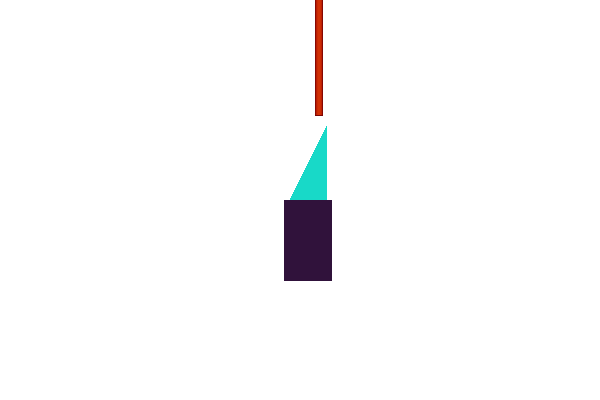

In [62]:
b.get_depth_image(gt_images_obj_orig[33,...,2])

In [27]:
registered_objects


[
    {
        't_init': 0,
        'pose': Array([[1.        , 0.        , 0.        , 0.34628752],
       [0.        , 1.        , 0.        , 0.8921869 ],
       [0.        , 0.        , 1.        , 7.187957  ],
       [0.        , 0.        , 0.        , 1.        ]], dtype=float32),
        't_full': 0,
        'full_pose': Array([[1.        , 0.        , 0.        , 0.34628752],
       [0.        , 1.        , 0.        , 0.8921869 ],
       [0.        , 0.        , 1.        , 7.187957  ],
       [0.        , 0.        , 0.        , 1.        ]], dtype=float32),
        'num_pixels': 4920,
        'mask': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]),
        'mesh': <trimesh.Tri

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# TODO: this is code used to check if resampling happened
n_particles = results['resampled_indices'].shape[1]
jnp.all(results['resampled_indices'] == np.arange(n_particles), axis = 1)

base_indices = np.arange(n_particles)
for i in range(results['resampled_indices'].shape[0]):
    base_indices = base_indices[results['resampled_indices'][i]]

max_rend_ll = 9600*jax.scipy.stats.norm.pdf(
        0.,
        loc=0.0, 
        scale=0.1
    ) * 0.01
offst = 3
# scene = implausible_perm_results[3]
scene = results# implausible_perm_results[3]

worst_rend = scene["worst_rend"]

data = scene["phy_ll"][0][offst:]

fig, axes = plt.subplots(6, 5, figsize=(15, 12))  # Adjust figsize as needed

# Set global min and max for y-axis
ymin, ymax = np.min(data), np.max(data)

for i in range(30):
    ax = axes[i//5, i%5]
    ax.plot(data[:, base_indices[i]])
    ax.set_ylim([-4.66, -4.57])  # Set the same y-axis limits for all plots
    ax.set_title(f"Particle {i+1}")
    # ax.set_yscale("log")

plt.tight_layout()
plt.show()


data = scene["rend_ll"][offst:]

fig, axes = plt.subplots(6, 5, figsize=(15, 12))  # Adjust figsize as needed

# Set global min and max for y-axis
ymin, ymax = np.min(data), np.max(data)

for i in range(30):
    ax = axes[i//5, i%5]
    ax.plot(data[:, base_indices[i]])
    ax.plot(worst_rend[offst:], linestyle="--")
    ax.set_ylim([worst_rend[offst:].min(),max_rend_ll + 0.1*(max_rend_ll - worst_rend[offst:].min())])
    ax.set_title(f"Particle {i+1}")
    # ax.set_yscale("log")



plt.tight_layout()
plt.show()

In [ ]:
# TODO: this is code used to check if resampling happened
n_particles = results['resampled_indices'].shape[1]
resampled_bool = jnp.all(results['resampled_indices'] == np.arange(n_particles), axis = 1)

base_indices = np.arange(n_particles)
for i in range(results['resampled_indices'].shape[0]):
    base_indices = base_indices[results['resampled_indices'][i]]

In [ ]:
resampled_bool

In [ ]:
def load_path(scene_name):
    with open(f"/home/arijitdasgupta/bayes3d/scripts/experiments/intphys/mcs/results_5/results_{scene_name}.pkl", 'rb') as file:
        return pickle.load(file)

plausible_scenes = [files[i].split("/")[-1][:-4] for i in range(62) if gt_bin[i] == 1]
implausible_scenes = [files[i].split("/")[-1][:-4] for i in range(62) if gt_bin[i] == 0]

plausible_scenes_perm = [x for x in plausible_scenes if "permanence" in x]
implausible_scenes_perm = [x for x in implausible_scenes if "permanence" in x]

plausible_perm_results = [determine_plausibility(load_path(x))[0] for x in plausible_scenes_perm]
implausible_perm_results = [determine_plausibility(load_path(x))[0] for x in implausible_scenes_perm]

plausible_scenes_shape = [x for x in plausible_scenes if "shape" in x]
implausible_scenes_shape = [x for x in implausible_scenes if "shape" in x]

plausible_shape_results = [determine_plausibility(load_path(x),3,0.75)[0] for x in plausible_scenes_shape]
implausible_shape_results = [determine_plausibility(load_path(x),3,0.75)[0] for x in implausible_scenes_shape]

plausible_scenes_cont = [x for x in plausible_scenes if "continuity" in x]
implausible_scenes_cont = [x for x in implausible_scenes if "continuity" in x]

plausible_cont_results = [determine_plausibility(load_path(x))[0] for x in plausible_scenes_cont]
implausible_cont_results = [determine_plausibility(load_path(x))[0] for x in implausible_scenes_cont]

In [ ]:
display(implausible_cont_results)
display(implausible_perm_results)
display(implausible_shape_results)
display(plausible_cont_results)
display(plausible_perm_results)
display(plausible_shape_results)

In [ ]:
for x in plausible_scenes_perm:
    print(x, determine_plausibility(load_path(x))[3])
for x in implausible_scenes_perm:
    print(x, determine_plausibility(load_path(x))[3])

for x in plausible_scenes_cont:
    print(x, determine_plausibility(load_path(x))[3])
for x in implausible_scenes_cont:
    print(x, determine_plausibility(load_path(x))[3])

for x in plausible_scenes_shape:
    print(x, determine_plausibility(load_path(x))[3])
for x in implausible_scenes_shape:
    print(x, determine_plausibility(load_path(x))[3])

In [ ]:
plausible_rend_markers = [np.min(np.max(x["rend_ll"][3:,:],axis=1)) for x in plausible_perm_results]
implausible_rend_markers = [np.min(np.max(x["rend_ll"][3:,:],axis=1)) for x in implausible_perm_results]

In [ ]:
plausible_rend_markers

In [ ]:
implausible_rend_markers

In [ ]:
plausible_phy_markers = [np.min(np.median(x["phy_ll"][0][3:,:],axis=1)) for x in plausible_perm_results]
implausible_phy_markers = [np.min(np.median(x["phy_ll"][0][3:,:],axis=1)) for x in implausible_perm_results]

In [ ]:
plausible_phy_markers, plausible_scenes_perm

In [ ]:
implausible_phy_markers, implausible_scenes_perm

In [ ]:
# Create a scatter plot for the first cluster (in blue)
plt.scatter(plausible_phy_markers, plausible_rend_markers, c='blue', label='Plausible')

# Create a scatter plot for the second cluster (in red)
plt.scatter(implausible_phy_markers, implausible_rend_markers, c='red', label='Implausible')

# Add labels and a title
plt.xlabel('Physics LL')
plt.ylabel('Rend LL')
plt.title('Cluster Plot')

# Add a legend to distinguish between clusters
plt.legend()

# Display the plot
plt.show()

In [ ]:
implausible_scenes_perm

In [ ]:
params = (jnp.array([1e-0,1e-0,5e-1]), 5e-1)
# params = (1e+20, 0)
display(b.gaussian_vmf_pose.logpdf(jnp.eye(4), jnp.eye(4).at[:3,3].set([0,0,0]), *params))
# display(b.gaussian_vmf_pose.logpdf(jnp.eye(4), jnp.eye(4).at[:3,3].set([0.005,0.0,0.0]), *params))
display(b.gaussian_vmf_pose.logpdf(jnp.eye(4), jnp.eye(4).at[:3,3].set([0.0,1,0.0]), *params))
display(b.gaussian_vmf_pose.logpdf(jnp.eye(4), jnp.eye(4).at[:3,3].set([0.0,0.0,1]), *params))
# 0.02 ll diff for movement of away

In [ ]:
display(b.gaussian_vmf_pose.logpdf(jnp.eye(4), jnp.eye(4).at[:3,3].set([1,0,0]), *(5e-0,5e-1)))

In [ ]:
params = [1,1,1]
display(genjax.tfp_mv_normal_diag.logpdf([0,0,0],[0,0,0],params))
display(genjax.tfp_mv_normal_diag.logpdf([0.1,0.1,0.0],[0,0,0],params))
display(genjax.tfp_mv_normal_diag.logpdf([0.0,0.1,0.1],[0,0,0],params))


In [ ]:
qs = jnp.linspace(0.05,0.95,30)
tfp.distributions.Normal(0.02,0.05).quantile(qs)

In [ ]:
display(9600*jax.scipy.stats.norm.pdf(
        np.array([0.]),
        loc=0.0, 
        scale=0.1
    ) * 0.01)

9600*jax.scipy.stats.norm.pdf(
        np.array([0.0001]),
        loc=0.0, 
        scale=0.1
    ) * 0.01



In [ ]:
3.9894223 * (2400-6) *0.01
